In [123]:
import numpy as np 
import pandas as pd


In [124]:
dataset = pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [125]:
X = dataset.iloc[:, :20].values
y = dataset.iloc[:, 20:21].values

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [127]:
# One-hot encoding 
# A, B, C, D ---> A = [1, 0, 0, 0]; B = [0, 1, 0, 0]; C = [0, 0, 1, 0]; D = [0, 0, 0, 1]
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
y = oe.fit_transform(y).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
X_train.shape, y_train.shape

((1600, 20), (1600, 4))

In [130]:
# Our first neural network 
import keras 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# add 1st layer with 16 neurons as input
layer1 = Dense(16, input_dim=20, activation='relu')
model.add(layer1)

# add 2nd layer with 12 neurons
layer2 = Dense(12, activation='relu')
model.add(layer2)


# add 2nd layer with 12 neurons
layer3 = Dense(8, activation='relu')
model.add(layer3)

# output layer
output_layer = Dense(4, activation='softmax')
model.add(output_layer)

In [131]:
# setup loss, optimizer, and metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

0
50/50 [==============================] - 0s 1ms/step - loss: 1.7269e-06 - accuracy: 1.0000 - val_loss: 1.1373 - val_accuracy: 0.9125
Epoch 366/500
50/50 [==============================] - 0s 1ms/step - loss: 1.6110e-06 - accuracy: 1.0000 - val_loss: 1.1408 - val_accuracy: 0.9125
Epoch 367/500
50/50 [==============================] - 0s 1ms/step - loss: 1.5327e-06 - accuracy: 1.0000 - val_loss: 1.1341 - val_accuracy: 0.9125
Epoch 368/500
50/50 [==============================] - 0s 1ms/step - loss: 1.5939e-06 - accuracy: 1.0000 - val_loss: 1.1416 - val_accuracy: 0.9150
Epoch 369/500
50/50 [==============================] - 0s 997us/step - loss: 1.4946e-06 - accuracy: 1.0000 - val_loss: 1.1340 - val_accuracy: 0.9150
Epoch 370/500
50/50 [==============================] - 0s 1ms/step - loss: 1.4782e-06 - accuracy: 1.0000 - val_loss: 1.1424 - val_accuracy: 0.9100
Epoch 371/500
50/50 [==============================] - 0s 1ms/step - loss: 1.4079e-06 - accuracy: 1.0000 - val_loss: 1.1489 - va

In [133]:
y_test_pred = model.predict(X_test)
y_test_pred_class = []
for i in range(len(y_test_pred)):
    pred_class = np.argmax(y_test_pred[i])
    y_test_pred_class.append(pred_class)

y_test_class = []
for i in range(len(y_test)):
    pred_class = np.argmax(y_test[i])
    y_test_class.append(pred_class)

In [134]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred=y_test_pred_class, y_true=y_test_class)
print(f"Accuracy on test set: {round(100 * acc, 2)}%")

Accuracy on test set: 91.0%


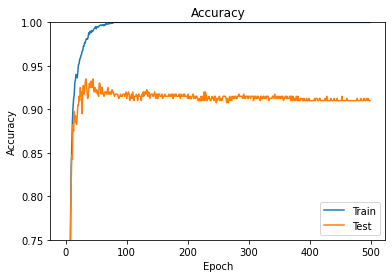

In [135]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0.75, 1)
plt.rcParams['figure.figsize'] = [30, 50]
plt.show()

In [136]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

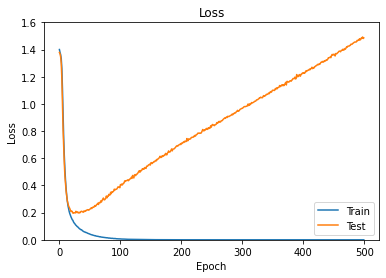

In [141]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0, 1.6)
plt.rcParams['figure.figsize'] = [30, 50]
plt.show()